In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import math

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
data = pd.read_csv('new_processed_17th_march.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,18,21,24,32,38,39,40,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols = ['uhid', 'modificationtime', 'pulserate', 'ecg_resprate',
       'spo2', 'heartrate', 'dischargestatus_x', 'mean_bp', 'sys_bp', 'dia_bp',
       'peep', 'pip', 'map', 'tidalvol', 'minvol', 'ti', 'fio2',
       'creationtime_y', 'abdomen_girth_y', 'urine', 'stool',
       'totalparenteralvolume', 'ph_y', 'entrydate_x', 'gender', 'birthweight',
       'birthlength', 'birthheadcircumference', 'inout_patient_status',
       'gestationweekbylmp', 'gestationdaysbylmp', 'baby_type', 'central_temp',
       'apgar_onemin', 'apgar_fivemin', 'apgar_tenmin', 'motherage',
       'conception_type', 'mode_of_delivery', 'steroidname', 'numberofdose',
       'rbs', 'skintemp', 'centraltemp', 'visitdate', 'currentdateweight',
       'currentdateheight', 'urine_pre_min', 'abd_diff', 'dose', 'typevalue',
       'medicinename_Amikacin', 'medicinename_Amoxicillin',
       'medicinename_Ampicillin', 'medicinename_Azithromycin',
       'medicinename_Cefoperazone + Sulbactam', 'medicinename_Cefotaxim',
       'medicinename_Cefotaxim (Biotax)', 'medicinename_Ceftriaxone',
       'medicinename_Ciprofloxacin', 'medicinename_Clarithromycin',
       'medicinename_Colisitin', 'medicinename_Colistin (intraventricular)',
       'medicinename_Dobutamine', 'medicinename_Dopamine',
       'medicinename_Doputamine', 'medicinename_Epinephrine',
       'medicinename_Gentamicin', 'medicinename_Linezolid',
       'medicinename_Magnix', 'medicinename_Meropenem',
       'medicinename_Metronidazole', 'medicinename_Midazolam',
       'medicinename_Milrinone', 'medicinename_Morphine',
       'medicinename_Netilmicin', 'medicinename_Ofloxacin',
       'medicinename_Piperacilin Tazobactam', 'medicinename_Teicoplanin',
       'medicinename_Tigecycline', 'medicinename_Vancomycin',
       'medicinename_Vasopressin',
       'medicinename_Zosyn (Piperacilin Tazobactam)', 'medicinename_levoflox']

In [4]:
data_ = data.copy()

In [5]:
data = data[cols]
data_ = data_[cols]

In [6]:
data = pd.get_dummies(data,columns=['stool'])
data_ = pd.get_dummies(data_,columns=['stool'])

In [7]:
data = pd.get_dummies(data,columns=['steroidname'])
data_ = pd.get_dummies(data_,columns=['steroidname'])

In [8]:
data = pd.get_dummies(data,columns=['mode_of_delivery'])
data_ = pd.get_dummies(data_,columns=['mode_of_delivery'])

In [9]:
def conception(x):
    if x == 'ivf':
        return 1
    else:
        return 0
data.conception_type = data.conception_type.apply(conception)
data_.conception_type = data_.conception_type.apply(conception)

In [10]:
def baby_type(x):
    if x == 'Twins' or x == 'Triplets':
        return 1
    else:
        return 0
data.baby_type = data.baby_type.apply(baby_type)
data_.baby_type = data_.baby_type.apply(baby_type)

In [11]:
def gender(x):
    if x == 'Male':
        return 1
    else:
        return 0
    
data.gender = data.gender.apply(gender)
data_.gender = data_.gender.apply(gender)

In [12]:
def discharge(x):
    if x == 'Discharge':
        return 0
    else:
        return 1

data.dischargestatus_x = data.dischargestatus_x.apply(discharge)
data_.dischargestatus_x = data_.dischargestatus_x.apply(discharge)

In [13]:
cols = ['uhid','pulserate', 'ecg_resprate', 'spo2', 'heartrate', 'dischargestatus_x',
       'mean_bp', 'sys_bp', 'dia_bp', 'peep', 'pip', 'map', 'tidalvol',
       'minvol', 'ti', 'fio2', 'abdomen_girth_y', 'urine',
       'totalparenteralvolume', 'ph_y', 'gender', 'birthweight', 'birthlength',
       'birthheadcircumference', 'inout_patient_status', 'gestationweekbylmp',
       'gestationdaysbylmp', 'baby_type', 'central_temp', 'apgar_onemin',
       'apgar_fivemin', 'apgar_tenmin', 'motherage', 'conception_type',
       'numberofdose', 'rbs', 'centraltemp', 'currentdateweight',
       'currentdateheight', 'urine_pre_min', 'abd_diff', 'dose',
       'medicinename_Amikacin', 'medicinename_Amoxicillin',
       'medicinename_Ampicillin', 'medicinename_Azithromycin',
       'medicinename_Cefoperazone + Sulbactam', 'medicinename_Cefotaxim',
       'medicinename_Cefotaxim (Biotax)', 'medicinename_Ceftriaxone',
       'medicinename_Ciprofloxacin', 'medicinename_Clarithromycin',
       'medicinename_Colisitin', 'medicinename_Colistin (intraventricular)',
       'medicinename_Dobutamine', 'medicinename_Dopamine',
       'medicinename_Doputamine', 'medicinename_Epinephrine',
       'medicinename_Gentamicin', 'medicinename_Linezolid',
       'medicinename_Magnix', 'medicinename_Meropenem',
       'medicinename_Metronidazole', 'medicinename_Midazolam',
       'medicinename_Milrinone', 'medicinename_Morphine',
       'medicinename_Netilmicin', 'medicinename_Ofloxacin',
       'medicinename_Piperacilin Tazobactam', 'medicinename_Teicoplanin',
       'medicinename_Tigecycline', 'medicinename_Vancomycin',
       'medicinename_Vasopressin',
       'medicinename_Zosyn (Piperacilin Tazobactam)', 'medicinename_levoflox',
       'stool_Large', 'stool_Medium', 'stool_Small', 'steroidname_Beta',
       'steroidname_Dexa', 'mode_of_delivery_Forceps', 'mode_of_delivery_LSCS',
       'mode_of_delivery_NVD', 'mode_of_delivery_Vaccum']

In [14]:
cols_2 = ['pulserate', 'ecg_resprate', 'spo2', 'heartrate',
       'mean_bp', 'sys_bp', 'dia_bp', 'peep', 'pip', 'map', 'tidalvol',
       'minvol', 'ti', 'fio2', 'abdomen_girth_y', 'urine',
       'totalparenteralvolume', 'ph_y', 'gender', 'birthweight', 'birthlength',
       'birthheadcircumference', 'inout_patient_status', 'gestationweekbylmp',
       'gestationdaysbylmp', 'baby_type', 'central_temp', 'apgar_onemin',
       'apgar_fivemin', 'apgar_tenmin', 'motherage', 'conception_type',
       'numberofdose', 'rbs', 'centraltemp', 'currentdateweight',
       'currentdateheight', 'urine_pre_min', 'abd_diff', 'dose',
       'medicinename_Amikacin', 'medicinename_Amoxicillin',
       'medicinename_Ampicillin', 'medicinename_Azithromycin',
       'medicinename_Cefoperazone + Sulbactam', 'medicinename_Cefotaxim',
       'medicinename_Cefotaxim (Biotax)', 'medicinename_Ceftriaxone',
       'medicinename_Ciprofloxacin', 'medicinename_Clarithromycin',
       'medicinename_Colisitin', 'medicinename_Colistin (intraventricular)',
       'medicinename_Dobutamine', 'medicinename_Dopamine',
       'medicinename_Doputamine', 'medicinename_Epinephrine',
       'medicinename_Gentamicin', 'medicinename_Linezolid',
       'medicinename_Magnix', 'medicinename_Meropenem',
       'medicinename_Metronidazole', 'medicinename_Midazolam',
       'medicinename_Milrinone', 'medicinename_Morphine',
       'medicinename_Netilmicin', 'medicinename_Ofloxacin',
       'medicinename_Piperacilin Tazobactam', 'medicinename_Teicoplanin',
       'medicinename_Tigecycline', 'medicinename_Vancomycin',
       'medicinename_Vasopressin',
       'medicinename_Zosyn (Piperacilin Tazobactam)', 'medicinename_levoflox',
       'stool_Large', 'stool_Medium', 'stool_Small', 'steroidname_Beta',
       'steroidname_Dexa', 'mode_of_delivery_Forceps', 'mode_of_delivery_LSCS',
       'mode_of_delivery_NVD', 'mode_of_delivery_Vaccum']

In [15]:
d = {'Out Born':0,'In Born':1}

data.inout_patient_status = data.inout_patient_status.map(d)
data_.inout_patient_status = data_.inout_patient_status.map(d)

In [16]:
data = data[cols]
data_ = data_[cols]
data.fillna(-999,inplace=True)

In [17]:
new_model = tf.keras.models.load_model('LSTM_model_23rd_march.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
data_death = data[data['dischargestatus_x']==1]
data_discharge = data[data['dischargestatus_x']==0]

In [19]:
def range_finder(x):
    length = x
    fractional = (x/15.0) - math.floor(x/15.0)
    return int(round(fractional*15))

In [ ]:
for i in data_death.uhid.unique():
    try:
        x = data_death[data_death['uhid']==i]
        x = x[cols_2]
        X = x[range_finder(len(x)):len(x)]
        X = np.array(X)
        Xtest = np.reshape(X, (-1, 15, X.shape[1]))
        y_pred = new_model.predict(Xtest)
        y_df = pd.DataFrame(y_pred)
        from pylab import rcParams
        rcParams['figure.figsize'] = 20, 6
        axes = plt.gca()


        sns.set(font_scale = 2)
        sns.scatterplot(y = y_df[0], x = np.arange(len(y_pred)),linewidth=0)
        #plt.title(uhid)
        plt.xlabel('LOS in Time Steps of 15 Minutes',fontsize=18)
        plt.ylabel('Probability',fontsize=18)
        axes.set_ylim([0,1])
        plt.savefig(str(i) + ".png",dpi = 300)
        pass
    except:
        continue

In [20]:
data_discharge.uhid.unique()

array(['RSHI.0000006216', 'RSHI.0000008273', 'RSHI.0000008539',
       'RSHI.0000008187', 'RSHI.0000008834', 'RSHI.0000008451',
       'RSHI.0000008900', 'RSHI.0000008450', 'RSHI.0000008551',
       'RSHI.0000008910', 'RSHI.0000008911', 'RSHI.0000009189',
       'RSHI.0000009105', 'RSHI.0000009048', 'RSHI.0000009229',
       'RSHI.0000009228', 'RSHI.0000009402', 'RSHI.0000009258',
       'RSHI.0000009259', 'RSHI.0000009438', 'RSHI.0000009469',
       'RSHI.0000009435', 'RSHI.0000009436', 'RSHI.0000009505',
       'RSHI.0000009583', 'RSHI.0000009584', 'RSHI.0000009512',
       'RSHI.0000009580', 'RSHI.0000009692', 'RSHI.0000009680',
       'RSHI.0000009743', 'RSHI.0000009791', 'RSHI.0000009834',
       'RSHI.0000009969', 'RSHI.0000009949', 'RSHI.0000010149',
       'RSHI.0000010210', 'RSHI.0000010222', 'RSHI.0000010649',
       'RSHI.0000010779', 'RSHI.0000010778', 'RSHI.0000010486',
       'RSHI.0000010700', 'RSHI.0000010796', 'RSHI.0000010798',
       'RSHI.0000010678', 'RSHI.00000107

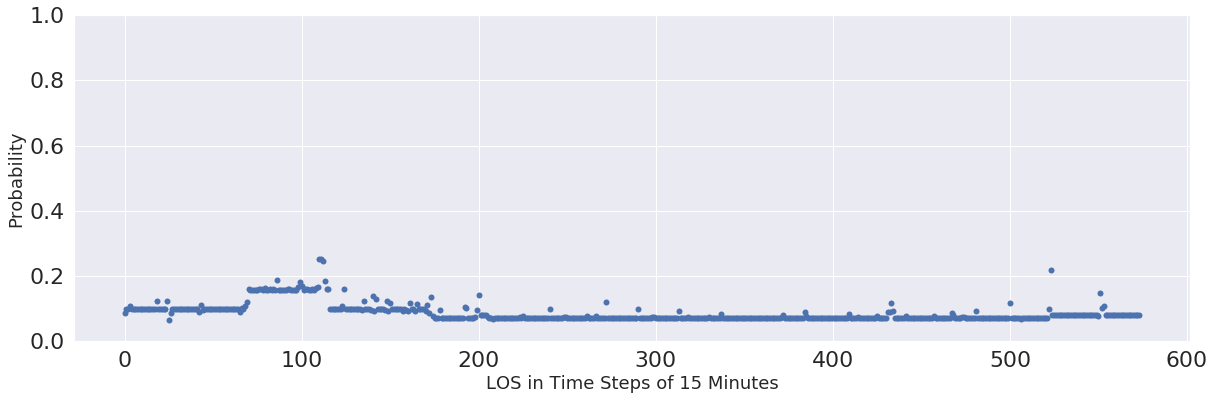

In [27]:
i = 'RSHI.0000014664'
x = data_discharge[data_discharge['uhid']==i]
x = x[cols_2]
X = x[range_finder(len(x)):len(x)]
X = np.array(X)
Xtest = np.reshape(X, (-1, 15, X.shape[1]))
y_pred = new_model.predict(Xtest)
y_df = pd.DataFrame(y_pred)
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6
axes = plt.gca()


sns.set(font_scale = 2)
sns.scatterplot(y = y_df[0], x = np.arange(len(y_pred)),linewidth=0)
#plt.title(uhid)
plt.xlabel('LOS in Time Steps of 15 Minutes',fontsize=18)
plt.ylabel('Probability',fontsize=18)
axes.set_ylim([0,1])
plt.savefig(str(i) + "_dis.png",dpi = 300)

In [25]:
data = data_death[data_death['uhid']=='RSHI.0000016943']

In [28]:
np.savetxt('RSHI.0000014664.csv',y_pred)